<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng" data-toc-modified-id="Nhập-thư-viện-và-định-nghĩa-hàm-hữu-dụng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nhập thư viện và định nghĩa hàm hữu dụng</a></span></li><li><span><a href="#Tải-dữ-liệu" data-toc-modified-id="Tải-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tải dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý" data-toc-modified-id="Tiền-xử-lý-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tiền xử lý</a></span></li><li><span><a href="#Bước-1:-Tạo-các-mô-hình-univariate" data-toc-modified-id="Bước-1:-Tạo-các-mô-hình-univariate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bước 1: Tạo các mô hình univariate</a></span></li><li><span><a href="#Bước-2:-Chọn-feature-tốt-nhất" data-toc-modified-id="Bước-2:-Chọn-feature-tốt-nhất-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bước 2: Chọn feature tốt nhất</a></span></li><li><span><a href="#Bước-3:-Thêm-lần-lượt-các-feature" data-toc-modified-id="Bước-3:-Thêm-lần-lượt-các-feature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bước 3: Thêm lần lượt các feature</a></span></li><li><span><a href="#Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)" data-toc-modified-id="Bước-4:-Xóa-các-feature-có-p-value->-0.1-(từ-model)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bước 4: Xóa các feature có p-value &gt; 0.1 (từ model)</a></span></li><li><span><a href="#Bước-5:-Xóa-một-feature-có-VIF->-3-(từ-model)" data-toc-modified-id="Bước-5:-Xóa-một-feature-có-VIF->-3-(từ-model)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bước 5: Xóa một feature có VIF &gt; 3 (từ model)</a></span></li><li><span><a href="#Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)" data-toc-modified-id="Bước-6:-Xóa-các-dữ-liệu-(hàng)-có-Cook’s-D-value->-1-(từ-tập-train)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value &gt; 1 (từ tập train)</a></span></li><li><span><a href="#Bước-7:-Đánh-giá" data-toc-modified-id="Bước-7:-Đánh-giá-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bước 7: Đánh giá</a></span></li><li><span><a href="#Bước-8:-Test" data-toc-modified-id="Bước-8:-Test-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Bước 8: Test</a></span></li></ul></div>

# Nhập thư viện và định nghĩa hàm hữu dụng

In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
def lat_to_x(lat):
    return (25.6 - lat) / 0.025

In [3]:
def lon_to_y(lon):
    return (lon - 100.1) / 0.025

In [4]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    rbar2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return rbar2

# Tải dữ liệu

In [5]:
train_data = pd.read_csv('data/train.csv')
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
0,1/1/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,4.722948,4.761801,4.804577,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
1,1/2/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,7.789521,7.800428,7.796861,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


In [6]:
direction_data = pd.read_csv('data/direction.csv')
direction_data

,feature,direction
0,Shrubs_3000,0
1,Shrubs_6000,0
2,Shrubs_9000,0
3,Herbaceous_vegetation_3000,0
4,Herbaceous_vegetation_6000,0
...,...,...
61,road_density_6000,1
62,road_density_9000,1
63,population_density_3000,1
64,population_density_6000,1


# Tiền xử lý

In [7]:
# Các hàng bị mất dữ liệu NO2
train_data[train_data['NO2'].isna()]

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
0,1/1/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,4.722948,4.761801,4.804577,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
1,1/2/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,557.835051,7.789521,7.800428,7.796861,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
128,5/23/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,511.418274,22.813865,22.820251,22.827409,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
129,5/24/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,480.566523,22.941944,22.942820,22.937745,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
130,5/25/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,476.939412,22.941944,22.942820,22.937745,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
131,5/26/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,647.397194,23.971521,23.974848,23.971626,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
132,5/27/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,478.186033,23.971521,23.974848,23.971626,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
133,5/28/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,235.336796,23.616576,23.607008,23.598239,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
135,5/30/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,448.317588,23.368021,23.434127,23.466177,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149
136,5/31/2019,21.0491,105.8831,NaN,NVC,0,0,0,0,0,...,309.345441,23.368021,23.434127,23.466177,3058.01241,2518.368833,2177.353131,65.648988,75.064685,74.036149


In [8]:
# Xoá dữ liệu bị mất
train_data.dropna(subset=['NO2'], inplace=True)
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


In [9]:
train_data['NO2'].describe()

count      4849.000000
mean        167.776477
std        9371.084202
min           0.000000
25%          14.550000
50%          21.808333
75%          34.653108
max      651519.076000
Name: NO2, dtype: float64

In [10]:
train_data['NO2'].sort_values()

1975         0.000000
1876         0.000000
1875         0.000000
1874         0.000000
1873         0.000000
            ...      
22          95.192095
3574        97.678375
3573       104.062462
754      37321.263950
895     651519.076000
Name: NO2, Length: 4849, dtype: float64

In [11]:
# Bỏ outlier
train_data = train_data.query("NO2 <= 200")

In [12]:
train_data

,time,lat,lon,NO2,name,Shrubs_3000,Shrubs_6000,Shrubs_9000,Herbaceous_vegetation_3000,Herbaceous_vegetation_6000,...,planetary_boundary_layer_height[pblh]_9000,dewpoint_temperature_(dpt)_3000,dewpoint_temperature_(dpt)_6000,dewpoint_temperature_(dpt)_9000,road_density_3000,road_density_6000,road_density_9000,population_density_3000,population_density_6000,population_density_9000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,0,0,0,0,0,...,334.620723,9.141778,8.949080,8.838265,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
3,1/4/2019,21.0491,105.8831,39.379204,NVC,0,0,0,0,0,...,232.602795,11.897894,11.879602,11.857450,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
4,1/5/2019,21.0491,105.8831,39.901879,NVC,0,0,0,0,0,...,296.998407,11.874306,11.914230,11.922872,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
5,1/6/2019,21.0491,105.8831,30.008246,NVC,0,0,0,0,0,...,269.357956,9.857271,9.888818,9.873468,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
6,1/7/2019,21.0491,105.8831,38.881163,NVC,0,0,0,0,0,...,415.254027,13.722359,13.686996,13.688688,3058.012410,2518.368833,2177.353131,65.648988,75.064685,74.036149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,0,0,0,0,0,...,606.885986,2.117986,2.249595,2.854099,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4883,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,0,0,0,0,0,...,346.317471,6.983771,7.294758,8.144295,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4884,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,0,0,0,0,0,...,346.317471,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716
4885,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,0,0,0,0,0,...,534.333673,14.466601,14.526416,15.006064,3864.637722,2794.262842,2051.262221,246.162011,144.556331,90.604716


# Bước 1: Tạo các mô hình univariate

In [13]:
def get_model_and_r2(features, X=None, y=None, use_lr=True):
    if X is None:
        X = train_data[features]
    if y is None:
        y = train_data['NO2']
    if use_lr:
        model = LinearRegression().fit(X, y)
    else:
        from sklearn.svm import SVR
        model = SVR().fit(X, y)
    y_pred = model.predict(X)
    adjusted_r2 = adjusted_r2_score(y, y_pred, len(features))
    return model, adjusted_r2

In [14]:
features = direction_data['feature']

In [15]:
univariate_models = {}
model_infos = []

for feature in features:
    direction = direction_data[direction_data['feature'] == feature]['direction'].to_numpy()[0]
    X = train_data[feature].to_numpy().reshape(-1, 1)
    y = train_data['NO2']
    lr, adjusted_r2 = get_model_and_r2([feature], X, y)
    univariate_models[feature] = lr
    model_infos.append([feature, direction, lr.coef_[0], lr.intercept_, adjusted_r2])
    
model_info_df = pd.DataFrame(model_infos, columns=['feature', 'direction', 'a', 'b', 'adjusted_r2'])
model_info_df

,feature,direction,a,b,adjusted_r2
0,Shrubs_3000,0,0.000000,25.728862,-0.000206
1,Shrubs_6000,0,0.000000,25.728862,-0.000206
2,Shrubs_9000,0,0.000000,25.728862,-0.000206
3,Herbaceous_vegetation_3000,0,0.000000,25.728862,-0.000206
4,Herbaceous_vegetation_6000,0,0.000000,25.728862,-0.000206
...,...,...,...,...,...
61,road_density_6000,1,0.004947,14.931652,0.042183
62,road_density_9000,1,0.005239,16.072403,0.017470
63,population_density_3000,1,0.037883,21.061746,0.037196
64,population_density_6000,1,0.040988,22.050929,0.013997


# Bước 2: Chọn feature tốt nhất

In [16]:
sorted_models_df = model_info_df.sort_values('adjusted_r2', ascending=False)

In [17]:
valid_model_df = sorted_models_df[(sorted_models_df['direction'] * 2 - 1) * sorted_models_df['a'] > 0]
valid_model_df

,feature,direction,a,b,adjusted_r2
10,Urban/built_up_6000,1,1.230155,16.499017,0.098541
28,Close_forest_6000,0,-0.997248,26.691339,0.068165
27,Close_forest_3000,0,-2.458191,26.700068,0.066492
9,Urban/built_up_3000,1,2.593975,19.004436,0.064021
60,road_density_3000,1,0.003301,16.700416,0.059596
29,Close_forest_9000,0,-0.539650,26.783780,0.058639
11,Urban/built_up_9000,1,0.512574,17.215925,0.049521
61,road_density_6000,1,0.004947,14.931652,0.042183
63,population_density_3000,1,0.037883,21.061746,0.037196
19,Permanent_water_bodies_6000,1,2.806104,23.261436,0.036362


In [18]:
invalid_model_df = sorted_models_df[(sorted_models_df['direction'] * 2 - 1) * sorted_models_df['a'] <= 0]
invalid_model_df

,feature,direction,a,b,adjusted_r2
21,Herbaceous_wetland_3000,0,17.055586,23.406459,0.140279
35,"Oceans,seas_9000",0,0.287726,25.160117,0.022189
34,"Oceans,seas_6000",0,0.471496,25.282561,0.015511
22,Herbaceous_wetland_6000,0,3.970307,24.590276,0.013031
33,"Oceans,seas_3000",0,1.370387,25.357357,0.011769
48,relative_humidity_3000,1,-0.023123,27.409839,0.000121
50,relative_humidity_9000,1,-0.012703,26.666959,-0.000124
49,relative_humidity_6000,1,-0.012035,26.610812,-0.000126
23,Herbaceous_wetland_9000,0,0.077767,25.691447,-0.000200
5,Herbaceous_vegetation_9000,0,0.000000,25.728862,-0.000206


In [19]:
best_feature = valid_model_df['feature'].to_numpy()[0]
H = univariate_models[best_feature]
print("Best feature: " + best_feature)

Best feature: Urban/built_up_6000


# Bước 3: Thêm lần lượt các feature

In [20]:
def is_model_valid(coefs, features):
    for i in range(len(features)):
        direction = direction_data.query(f'feature == "{features[i]}"')['direction'].to_numpy()[0] * 2 - 1
        if coefs[i] * direction < 0:
            return False
    return True

is_model_valid([14.946586, -13.687712], ['relative_humidity_9000', 'relative_humidity_6000'])

False

In [21]:
EPS = 0.001

models = {}
current_r2 = valid_model_df['adjusted_r2'].to_numpy()[0]
chosen_features = []
chosen_features.append(best_feature)
remaining_features = set(features)
remaining_features.remove(best_feature)
print(f"Step: {len(chosen_features)}, added: {best_feature}, r2: {current_r2}")
while len(remaining_features) > 0:
    valid_models = []
    for feature in remaining_features:
        models[feature], adjusted_r2 = get_model_and_r2(chosen_features + [feature])
        if is_model_valid(models[feature].coef_, chosen_features + [feature]):
            valid_models.append([feature, adjusted_r2])

    if len(valid_models) == 0:
        break
    best_feature_id = np.array(valid_models)[:, 1].argmax()
    best_feature, adjusted_r2 = valid_models[best_feature_id]
    if adjusted_r2 - current_r2 <= EPS:
        break
    
    print(f"Step: {len(chosen_features) + 1}, added: {best_feature}, r2: {adjusted_r2}, increased by: {adjusted_r2 - current_r2}")
    chosen_features.append(best_feature)
    coefs = models[best_feature].coef_
    print(f"Coefs: {coefs}")
    print(f"Most important feature: {chosen_features[np.argmax(coefs)]}, coef: {coefs[np.argmax(coefs)]}")
    print()
    remaining_features.remove(best_feature)
    current_r2 = adjusted_r2

Step: 1, added: Urban/built_up_6000, r2: 0.09854068305171271
Step: 2, added: Permanent_water_bodies_9000, r2: 0.1671066893951465, increased by: 0.0685660063434338
Coefs: [1.71587275 3.20953593]
Most important feature: Permanent_water_bodies_9000, coef: 3.209535928402487

Step: 3, added: Herbaceous_wetland_6000, r2: 0.22568328124864434, increased by: 0.05857659185349784
Coefs: [  2.62665996   6.13554379 -12.4489065 ]
Most important feature: Permanent_water_bodies_9000, coef: 6.1355437867712315

Step: 4, added: Close_forest_6000, r2: 0.2922947163511621, increased by: 0.06661143510251777
Coefs: [  2.43166166   7.57062867 -15.4886563   -1.15542408]
Most important feature: Permanent_water_bodies_9000, coef: 7.570628672830869

Step: 5, added: Cultivated_and_managed_vegetation/agriculture_9000, r2: 0.3338209059269779, increased by: 0.041526189575815775
Coefs: [  2.274844     6.26721409 -14.68421405  -1.74794963  -0.55158362]
Most important feature: Permanent_water_bodies_9000, coef: 6.2672140

# Bước 4: Xóa các feature có p-value > 0.1 (từ model)

In [22]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [23]:
P_VALUE_THRESHOLD = 0.1
_, filtered_features = backwardElimination(train_data[chosen_features].values, train_data['NO2'].values, P_VALUE_THRESHOLD, chosen_features)

In [24]:
# Train lại, so sánh với mô hình trước.
_, adjusted_r2 = get_model_and_r2(filtered_features)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {filtered_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    chosen_features = filtered_features
    current_r2 = adjusted_r2

print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000', 'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'pressure_3000', 'Open_forest_3000'], r2: 0.4375476481167144
After: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000', 'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'pressure_3000', 'Open_forest_3000'], r2: 0.4375476481167144
Best features: ['Urban/built_up_6000', 'Permanent_water_bodies_9000', 'Herbaceous_wetland_6000', 'Close_forest_6000', 'Cultivated_and_managed_vegetation/agriculture_9000', 'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000', 'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'pressure_3000

# Bước 5: Xóa một feature có VIF > 3 (từ model)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x, threshold):
    output = x
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ', a)
        if(vif[a] <= threshold):
            break
        if(i==1):
            output = x.drop(x.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        break
    return(output)

In [26]:
VIF_THRESHOLD = 3
remaining_features = cal_vif(train_data[chosen_features], VIF_THRESHOLD).columns

print("Remaining features: ", end='')
print(remaining_features)

Iteration no  1
[41.54487723139413, 14.713593492296214, 5.446490547726852, 16.21949522265166, 322.1325713820208, 17.202635973907302, 10.668533706494289, 2.2901623134688425, 22.770805391550418, 4.246568164031737, 646.5881353957301, 2.6254447241794994]
Max vif is for variable no :  10
Remaining features: Index(['Urban/built_up_6000', 'Permanent_water_bodies_9000',
       'Herbaceous_wetland_6000', 'Close_forest_6000',
       'Cultivated_and_managed_vegetation/agriculture_9000',
       'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000',
       'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'Open_forest_3000'],
      dtype='object')


In [27]:
#  So sánh với các mô hình trước.
_, adjusted_r2 = get_model_and_r2(remaining_features)
print(f"After deleting one feature with highest VIF: {remaining_features}, r2: {adjusted_r2}")
print(f"R2 decreased by {current_r2 - adjusted_r2}")
chosen_features = remaining_features
current_r2 = adjusted_r2

After deleting one feature with highest VIF: Index(['Urban/built_up_6000', 'Permanent_water_bodies_9000',
       'Herbaceous_wetland_6000', 'Close_forest_6000',
       'Cultivated_and_managed_vegetation/agriculture_9000',
       'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000',
       'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'Open_forest_3000'],
      dtype='object'), r2: 0.4293583922499197
R2 decreased by 0.008189255866794753


In [28]:
best_model, _ = get_model_and_r2(chosen_features)

# Bước 6: Xóa các dữ liệu (hàng) có Cook’s D value > 1 (từ tập train)

In [29]:
import statsmodels.api as sm
def cal_cooks_distance(x, y, threshold):
    #add constant to predictor variables
    x = sm.add_constant(x)
    #fit linear regression model
    model = sm.OLS(y, x).fit()
    np.set_printoptions(suppress=True)
    #create instance of influence
    influence = model.get_influence()
    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance
    print("100 highest Cook's D values:")
    print(pd.Series(cooks[0]).sort_values(ascending=False).head(100).to_numpy())
    
    rows = []
    for i in range(len(cooks[0])):
        if cooks[0][i] <= threshold:
            rows.append(i)
    return x.iloc[rows].drop(columns=['const']), y.iloc[rows]

In [30]:
COOKS_D_THRESHOLD = 1
x_cook, y_cook = cal_cooks_distance(train_data[chosen_features], train_data['NO2'], COOKS_D_THRESHOLD)

print(f"Remaining rows: {len(x_cook)}")

100 highest Cook's D values:
[0.0249816  0.01491813 0.01301194 0.01043008 0.00950031 0.00762831
 0.00736153 0.00633417 0.00617929 0.00595861 0.00567134 0.00552599
 0.00510086 0.00502275 0.0043361  0.00426968 0.00420363 0.00415971
 0.00378068 0.00370478 0.00363553 0.0035529  0.00347801 0.00337561
 0.00335208 0.0033427  0.00326054 0.00314584 0.00307215 0.0029896
 0.00285759 0.00282371 0.00281074 0.00277888 0.00274906 0.00272222
 0.00266824 0.00264797 0.00264508 0.00263495 0.0026227  0.0025929
 0.00258779 0.00258556 0.00249992 0.00247245 0.00246768 0.00244799
 0.00239863 0.00239231 0.0022362  0.00222248 0.00220577 0.0021939
 0.00218384 0.00215695 0.00212692 0.00211775 0.00210605 0.00210348
 0.00210142 0.00208027 0.00206507 0.00203205 0.00203195 0.00203189
 0.00202748 0.00202334 0.00202292 0.00202063 0.00201182 0.00200519
 0.00199843 0.00196069 0.00195815 0.0019513  0.00194515 0.00193916
 0.00192571 0.00191859 0.00191579 0.00191529 0.00190498 0.00189931
 0.00187852 0.00187804 0.00186617 0.

In [31]:
#  Train lại, so sánh với các mô hình trước.
model_cook, adjusted_r2 = get_model_and_r2(chosen_features, x_cook, y_cook)
print(f"Before: {chosen_features}, r2: {current_r2}")
print(f"After: {chosen_features}, r2: {adjusted_r2}")
if adjusted_r2 > current_r2:
    current_r2 = adjusted_r2
    best_model = model_cook
    
print(f"Best features: {chosen_features}, r2: {current_r2}")

Before: Index(['Urban/built_up_6000', 'Permanent_water_bodies_9000',
       'Herbaceous_wetland_6000', 'Close_forest_6000',
       'Cultivated_and_managed_vegetation/agriculture_9000',
       'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000',
       'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'Open_forest_3000'],
      dtype='object'), r2: 0.4293583922499197
After: Index(['Urban/built_up_6000', 'Permanent_water_bodies_9000',
       'Herbaceous_wetland_6000', 'Close_forest_6000',
       'Cultivated_and_managed_vegetation/agriculture_9000',
       'population_density_3000', 'Herbaceous_wetland_9000', 'S5P_NO2_9000',
       'Oceans,seas_6000', 'Permanent_water_bodies_3000', 'Open_forest_3000'],
      dtype='object'), r2: 0.4293583922499197
Best features: Index(['Urban/built_up_6000', 'Permanent_water_bodies_9000',
       'Herbaceous_wetland_6000', 'Close_forest_6000',
       'Cultivated_and_managed_vegetation/agriculture_9000',
       'population_density_3000', '

# Bước 7: Đánh giá

In [32]:
stations = train_data['name'].unique()
stations

array(['NVC', 'ChiCuc', 'DaNang', 'HaLong-QuangNinh', 'HangDau',
       'HoanKiem', 'Hue', 'KimLien', 'MinhKhai', 'MyDinh', 'PVD',
       'PhuTho', 'TanMai', 'TayMo', 'ThanhCong'], dtype=object)

In [33]:
cross_val_scores = []
for station in stations:
    X_train = train_data.query(f'name != "{station}"')[chosen_features]
    y_train = train_data.query(f'name != "{station}"')['NO2']
    X_test = train_data.query(f'name == "{station}"')[chosen_features]
    y_test = train_data.query(f'name == "{station}"')['NO2']
    lr, _ = get_model_and_r2(chosen_features, X_train, y_train)
    y_pred = lr.predict(X_test)
    adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(chosen_features))
    cross_val_scores.append(adjusted_r2)
    print(f'Leave station "{station}" out: {adjusted_r2}')
print(f'Average Adjusted R2: {np.mean(cross_val_scores)}')

Leave station "NVC" out: -12.938068274424054
Leave station "ChiCuc" out: -1.3403268245961648
Leave station "DaNang" out: -0.09472761891682624
Leave station "HaLong-QuangNinh" out: -8.82268688142077
Leave station "HangDau" out: -0.4583005137133851
Leave station "HoanKiem" out: -3.9247109452882816
Leave station "Hue" out: -3218.8112439910556
Leave station "KimLien" out: -1.4211702589769741
Leave station "MinhKhai" out: -0.41024012013964817
Leave station "MyDinh" out: -1.7006431509985216
Leave station "PVD" out: -0.33313063346100535
Leave station "PhuTho" out: -1.2000914543703294
Leave station "TanMai" out: -1.497234115860571
Leave station "TayMo" out: -0.6874012987288041
Leave station "ThanhCong" out: -0.08429636355498493
Average Adjusted R2: -216.91495149636708


# Bước 8: Test

In [34]:
from osgeo import gdal
from osgeo import osr
from osgeo.gdalconst import *
import matplotlib.pyplot as plt

In [35]:
# Function to read the original file's projection:
def GetGeoInfo(FileName):
    SourceDS = gdal.Open(FileName, GA_ReadOnly)
    NDV = SourceDS.GetRasterBand(1).GetNoDataValue()
    xsize = SourceDS.RasterXSize
    ysize = SourceDS.RasterYSize
    GeoT = SourceDS.GetGeoTransform()
    Projection = osr.SpatialReference()
    Projection.ImportFromWkt(SourceDS.GetProjectionRef())
    DataType = SourceDS.GetRasterBand(1).DataType
    DataType = gdal.GetDataTypeName(DataType)
    return NDV, xsize, ysize, GeoT, Projection, DataType

In [36]:
def ReadGeoTiff(FilePath):
    dataset = gdal.Open(FilePath, GA_ReadOnly)
    # Get the first (and only) band.
    band = dataset.GetRasterBand(1)
    # Open as an array.
    return band.ReadAsArray()

In [37]:
# Function to write a new file.
def CreateGeoTiff(NewFilePath, Array, driver, NDV, 
                  xsize, ysize, GeoT, Projection, DataType):
    if DataType == 'Float32':
        DataType = gdal.GDT_Float32
    elif DataType == 'Float64':
        DataType = gdal.GDT_Float64
    elif DataType == 'Byte':
        DataType = gdal.GDT_Byte
    # Set nans to the original No Data Value
    if NDV is None:
        NDV = np.nan
    Array[np.isnan(Array)] = NDV
    # Set up the dataset
    DataSet = driver.Create( NewFilePath, xsize, ysize, 1, DataType )
            # the '1' is for band 1.
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection( Projection.ExportToWkt() )
    # Write the array
    DataSet.GetRasterBand(1).WriteArray( Array )
    DataSet.GetRasterBand(1).SetNoDataValue(NDV)
    return NewFilePath

In [38]:
def test_date(date):
    templateFilePath = r'data/template.tif'
    array = ReadGeoTiff(templateFilePath)
    
    array = np.full(array.shape, np.nan)
    test_data = pd.read_csv(f'data/test/test{date.year}{date.month:02}{date.day:02}.csv')
    no2 = best_model.predict(test_data[chosen_features])
    test_locations = test_data[['lat', 'lon']].to_numpy()
    for i in range(len(no2)):
        lat, lon = test_locations[i]
        x, y = lat_to_x(lat), lon_to_y(lon)
        array[round(x)][round(y)] = no2[i]
    
    NDV, xsize, ysize, GeoT, Projection, DataType = GetGeoInfo(templateFilePath)
    # Set up the GTiff driver
    driver = gdal.GetDriverByName('GTiff')
    outputFile = CreateGeoTiff(f'output/NO2_{date.year}{date.month:02}{date.day:02}.tif',
                               array, driver, NDV, xsize, ysize, GeoT, Projection, DataType)
    return array

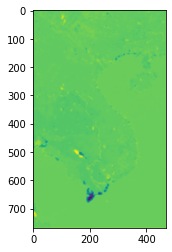

In [39]:
# Thử test ngày 16/2/2019 và trực quan hóa kết quả
output1 = test_date(datetime.datetime(2019, 2, 16))
plt.imshow(output1)

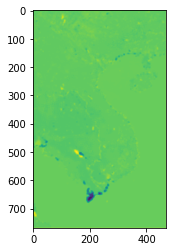

In [40]:
# Thử test ngày 18/4/2019 và trực quan hóa kết quả
output2 = test_date(datetime.datetime(2019, 4, 18))
plt.imshow(output2)

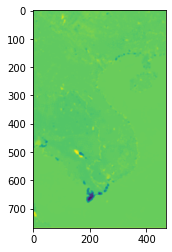

In [41]:
# Thử test ngày 15/11/2019 và trực quan hóa kết quả
output3 = test_date(datetime.datetime(2019, 11, 15))
plt.imshow(output3)